In [186]:
import pandas as pd
import numpy as np
import matplotlib; matplotlib.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings; warnings.filterwarnings('ignore')

plt.style.use('ggplot')

- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태

In [187]:
raw_df = pd.read_csv('/kaggle/input/coronavirusdataset/patient.csv')
print(raw_df.shape)
raw_df.head()

(5766, 14)


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [188]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 14 columns):
id                  5766 non-null int64
sex                 417 non-null object
birth_year          404 non-null float64
country             5765 non-null object
region              406 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      5765 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5765 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 630.8+ KB


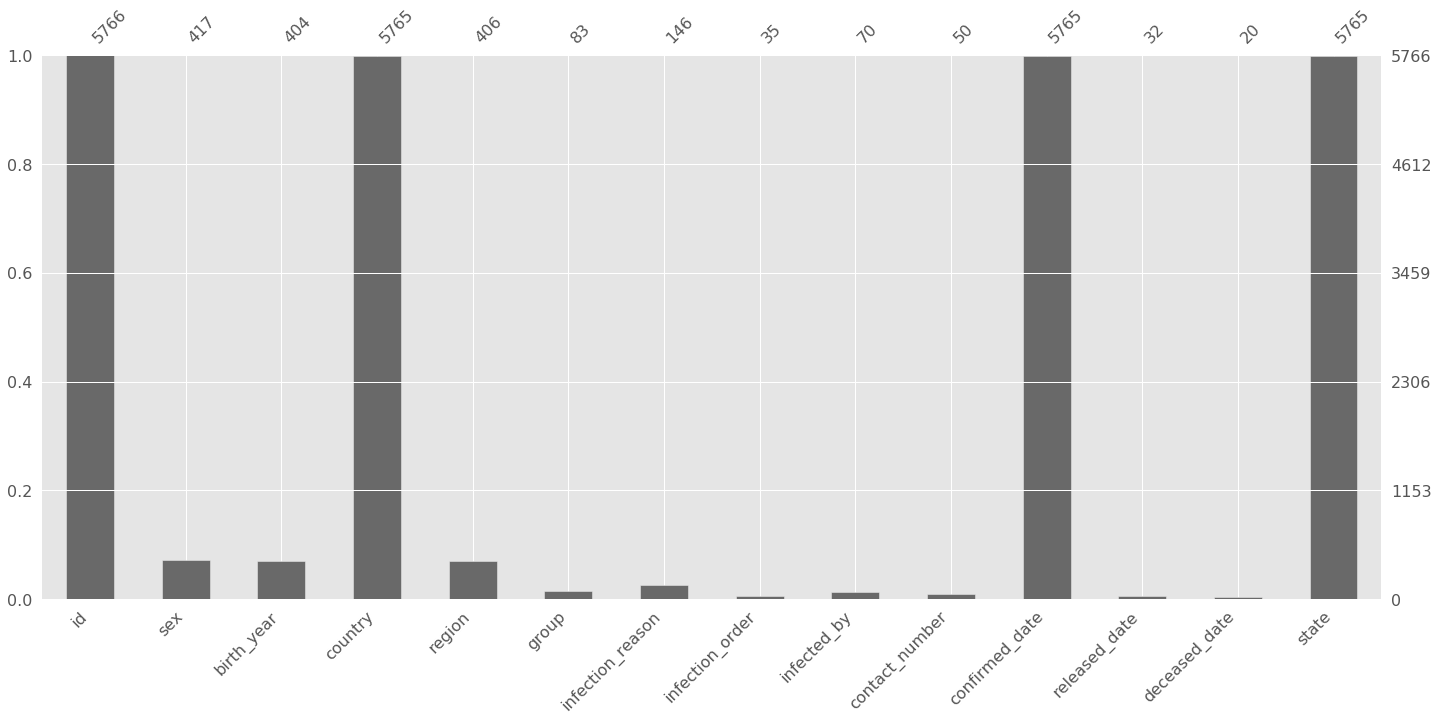

In [189]:
msno.bar(raw_df)

- 결측치가 매우 많음  

In [190]:
raw_df.describe(include='all')

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,5766.000000,417,404.000000,5765,406,83,146,35.000000,70.000000,50.000000,5765,32,20,5765
unique,NaN,2,NaN,3,14,6,15,NaN,NaN,NaN,30,17,11,3
top,NaN,female,NaN,Korea,capital area,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-02-19,2020-02-23,isolated
freq,NaN,212,NaN,5756,191,53,75,NaN,NaN,NaN,1062,4,4,5710
mean,2883.500000,NaN,1974.386139,NaN,NaN,NaN,NaN,2.285714,379.000000,69.400000,NaN,NaN,NaN,NaN
std,1664.645157,NaN,17.510278,NaN,NaN,NaN,NaN,1.405272,540.247528,182.876338,NaN,NaN,NaN,NaN
min,1.000000,NaN,1932.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,1442.250000,NaN,1961.000000,NaN,NaN,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN
50%,2883.500000,NaN,1974.500000,NaN,NaN,NaN,NaN,2.000000,126.000000,15.500000,NaN,NaN,NaN,NaN
75%,4324.750000,NaN,1989.000000,NaN,NaN,NaN,NaN,3.000000,563.250000,44.500000,NaN,NaN,NaN,NaN


In [191]:
# 각 컬럼의 결측치 개수
raw_df.isnull().sum().to_frame().T

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,0,5349,5362,1,5360,5683,5620,5731,5696,5716,1,5734,5746,1


## 각 컬럼 살펴보기(cleaning)

### sex

['female' 'male' nan]


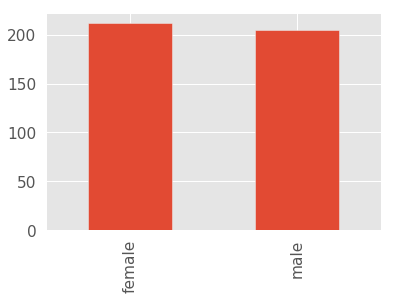

In [192]:
print(raw_df['sex'].unique())
plt.style.use('ggplot')
raw_df['sex'].value_counts().plot.bar()

In [193]:
raw_df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


### bitrh_year

In [194]:
raw_df['birth_year'].value_counts()

1985.0    23
1956.0    12
1997.0    12
1996.0    11
1995.0    10
          ..
2007.0     1
1935.0     1
1952.0     1
1940.0     1
1934.0     1
Name: birth_year, Length: 76, dtype: int64

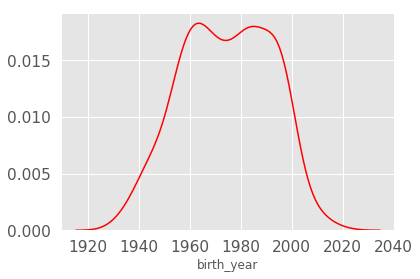

In [195]:
sns.distplot(raw_df['birth_year'], hist=False, color='red')

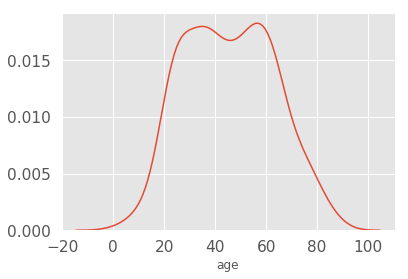

In [196]:
# birth_year 대신 age 컬럼을 새로 만들겠다
# raw_df['birth_year'] = raw_df['birth_year'].astype(float).map(lambda x: x if x>0 else np.nan)
raw_df['age'] = pd.datetime.now().year - raw_df['birth_year']
sns.distplot(raw_df['age'], hist=False)

In [197]:
raw_df.drop(['birth_year'], axis=1, inplace=True)
raw_df.head(3)

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0


### country & region

In [198]:
raw_df.isnull().sum().to_frame().T

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,0,5349,1,5360,5683,5620,5731,5696,5716,1,5734,5746,1,5362


In [199]:
print(raw_df['country'].value_counts()); print('------------------------')
print(raw_df['region'].value_counts())
raw_df[['country', 'region']].head()

Korea       5756
China          8
Mongolia       1
Name: country, dtype: int64
------------------------
capital area           191
Gyeongsangbuk-do       121
Daegu                   46
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeollabuk-do             3
Jeollanam-do             3
Busan                    2
Ulsan                    2
Chungcheongbuk-do        2
Jeju-do                  2
Chungcheongnam-do        1
Name: region, dtype: int64


,country,region
0,China,filtered at airport
1,Korea,filtered at airport
2,Korea,capital area
3,Korea,capital area
4,Korea,capital area


- region 컬럼의 데이터 정제

In [200]:
def region_clean(df):
    if pd.isnull(df):
        return np.nan
    else:
        return df.replace('Gyeongsangbuk-do', 'Gyeongbuk').\
    replace('capital area', 'Capital').replace('Dague', 'Daegu').\
    replace('Gangwon-do', 'Gangwon').replace('Jeollabuk-do', 'Jeonbuk').replace('Jeollanam-do', 'Jeonnam').\
    replace('Jeju-do', 'Jeju').replace('Chungcheongbuk-do', 'Chungcheong').\
    replace('Chungcheongnam-do', 'Chungcheong')
    
raw_df['region'] = raw_df['region'].apply(region_clean)
raw_df['region'].value_counts()

Capital                191
Gyeongbuk              121
Daegu                   46
Daejeon                 13
Gwangju                 11
Gangwon                  5
filtered at airport      4
Jeonnam                  3
Jeonbuk                  3
Chungcheong              3
Busan                    2
Ulsan                    2
Jeju                     2
Name: region, dtype: int64

In [201]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf 
cf.go_offline(connected=True)

raw_df['region'].iplot(kind='hist', linecolor='blue')

### group, infection_reason, infection_order, infected_by

In [202]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0


In [203]:
print(raw_df['group'].value_counts()); print('--------------------')
print(raw_df['infection_reason'].value_counts()); print('------------------')
print(raw_df['infection_order'].value_counts()); print('---------------------')
print(raw_df['infected_by'].value_counts())

Shincheonji Church               53
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Onchun Church                     1
Myungsung church                  1
Name: group, dtype: int64
--------------------
contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
contact with patient in Singapore     2
visit to Thailand                     2
visit to Italy                        1
contact with patient in Japan         1
visit to Cheongdo Daenam Hospital     1
visit to Vietnam                      1
visit to China                        1
visit to Shincheonji Church           1
 visit to China                       1
visit to Japan                        1
Name: infection_reason, dtype: int64
------------------
1.0    13
2.0    10
3.0     6
5.0     3
4.0     2
6.0     1
Name: infection_order

In [204]:
def infection_reason_clean(df):
    if pd.isnull(df):
        return np.nan
    if 'Wuhan' in df:
        return 'Wuhan'
    if 'Daegu' in df:
        return 'Daegu'
    if 'Israel' in df: 
        return 'Abroad'
    if 'Thailand' in df:
        return 'Abroad'
    if 'Singapore' in df:
        return 'Abroad'
    if 'Vietnam' in df:
        return 'Abroad'
    if 'Japan' in df:
        return 'Abroad'
    if 'China' in df:
        return 'Abroad'
    if 'Italy' in df:
        return 'Italy'
    if 'Cheongdo' in df:
        return 'Cheongo Daenam hospital'
    else:
        return df
        
raw_df['infection_reason'] = raw_df['infection_reason'].apply(infection_reason_clean)
raw_df['infection_reason'].value_counts()

contact with patient           75
Daegu                          43
Abroad                         15
Wuhan                          10
visit to Shincheonji Church     1
Italy                           1
Cheongo Daenam hospital         1
Name: infection_reason, dtype: int64

Text(0.5, 1.0, 'infection order')

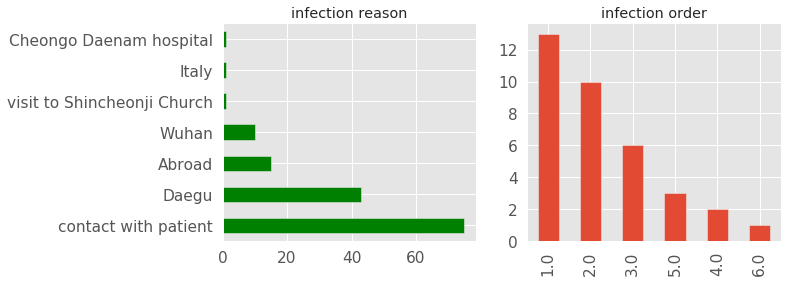

In [205]:
fig = plt.figure(figsize=(10, 4))

fig.add_subplot(1, 2, 1)
raw_df['infection_reason'].value_counts().plot.barh(color='green')
plt.title('infection reason')
fig.add_subplot(1, 2, 2)
raw_df['infection_order'].value_counts().plot.bar()
plt.title('infection order')

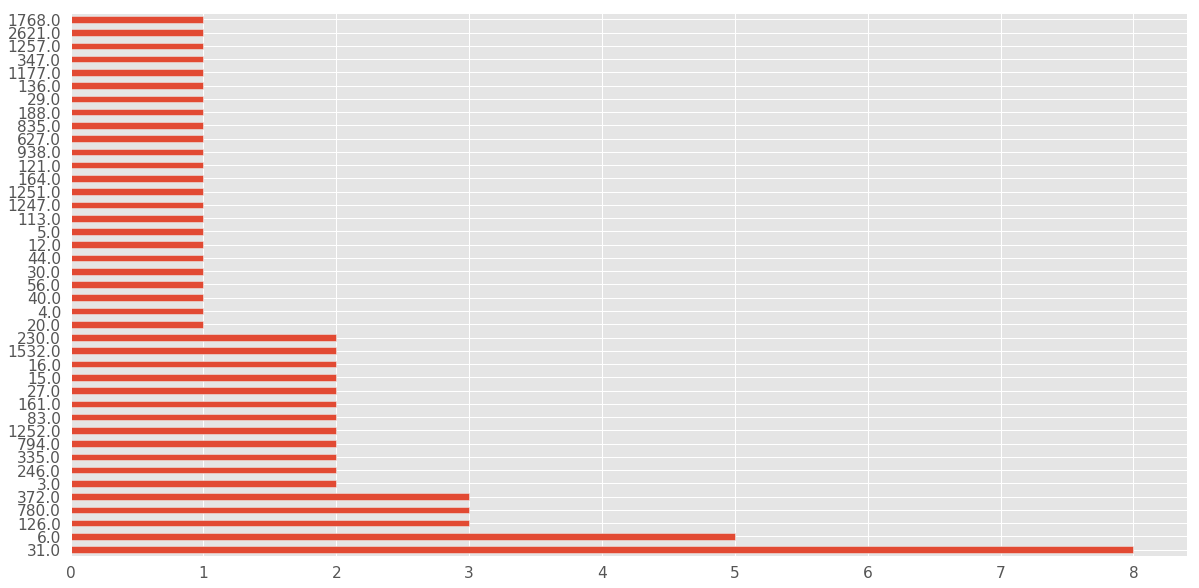

In [206]:
raw_df['infected_by'].value_counts().plot(kind='barh', figsize=(20,10))

### contact_number, state

In [207]:
print(raw_df['contact_number'].value_counts())
raw_df['contact_number'].value_counts().iplot(kind='bar')

2.0       5
0.0       4
1.0       3
23.0      3
14.0      2
9.0       2
3.0       2
8.0       2
95.0      1
30.0      1
40.0      1
12.0      1
15.0      1
6.0       1
11.0      1
17.0      1
16.0      1
5.0       1
20.0      1
43.0      1
113.0     1
61.0      1
65.0      1
47.0      1
75.0      1
422.0     1
31.0      1
39.0      1
68.0      1
27.0      1
450.0     1
117.0     1
290.0     1
1160.0    1
45.0      1
Name: contact_number, dtype: int64


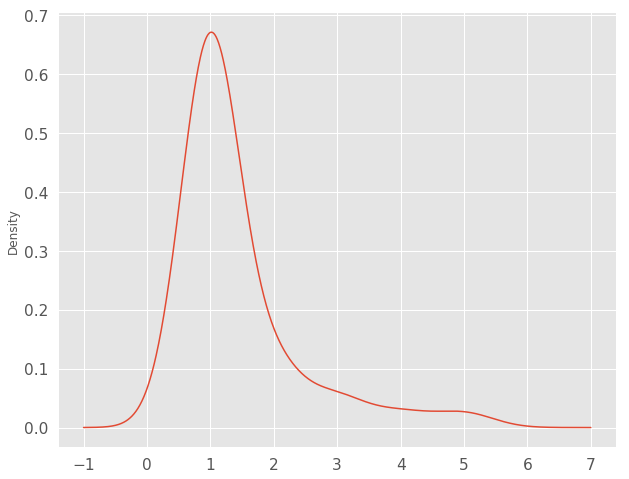

In [208]:
plt.figure(figsize=(10,8))
raw_df['contact_number'].value_counts().plot.kde()

Text(0.5, 1.0, 'state')

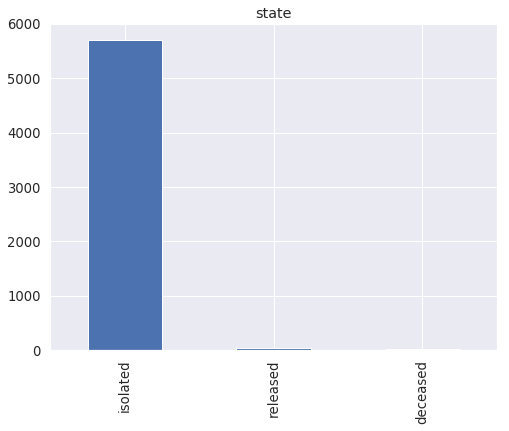

In [209]:
sns.set(font_scale=1.2)
raw_df['state'].value_counts().plot.bar(figsize=(8,6))
plt.title('state')

In [210]:
table = pd.pivot_table(data=raw_df,
               index='id',
              values='contact_number',
              aggfunc='sum')
table = table[table['contact_number'] > 0]
table

,contact_number
id,
1,45.0
2,75.0
3,16.0
4,95.0
5,31.0
6,17.0
7,9.0
8,113.0
9,2.0


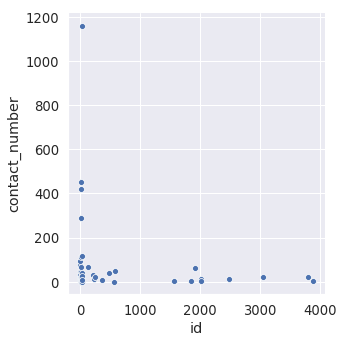

In [211]:
sns.relplot(y='contact_number', x='id', data=table.reset_index())

### confirmed_date, released_date, deceased_date

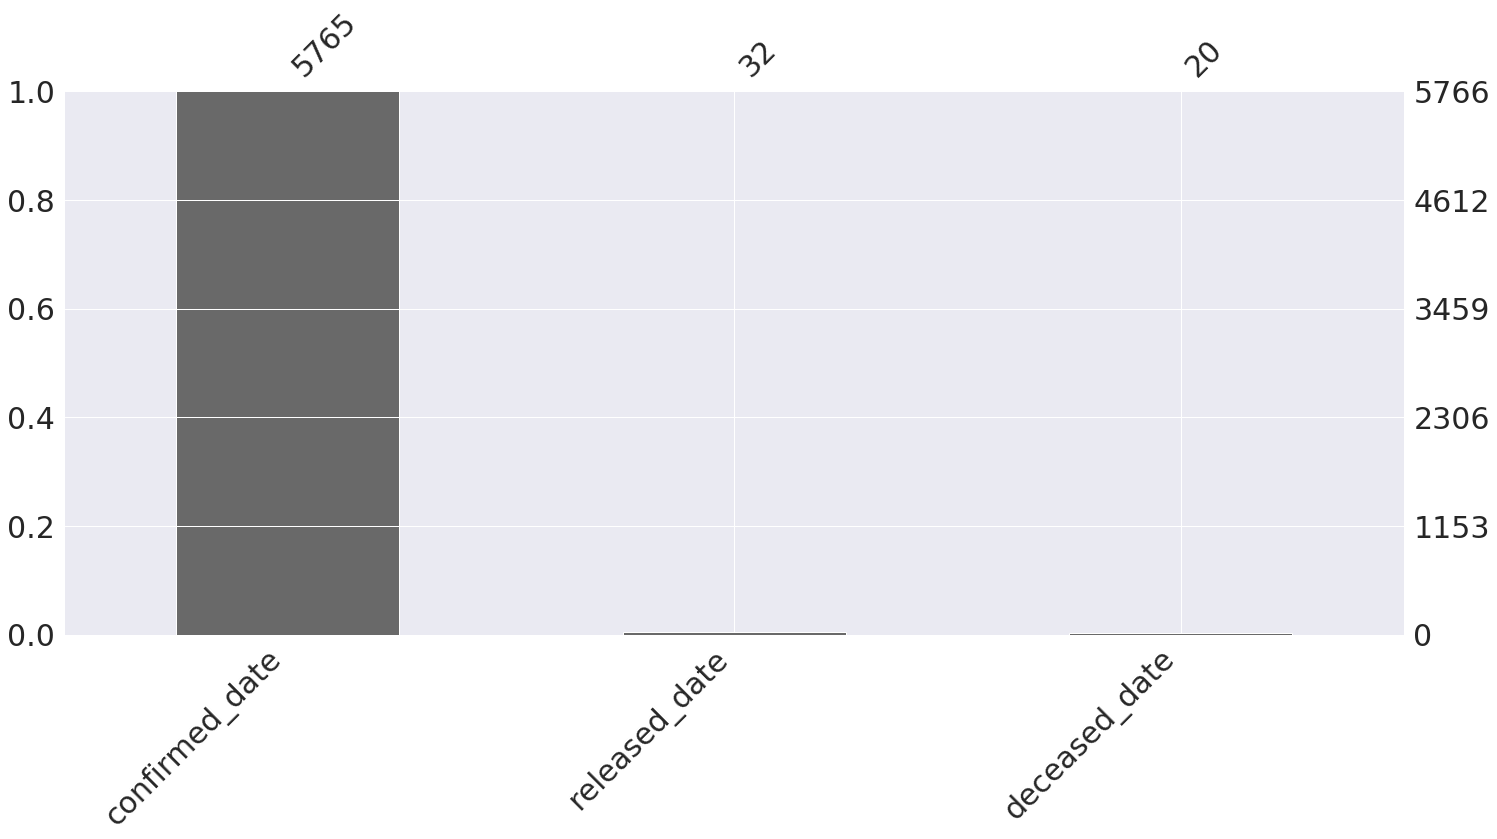

In [212]:
msno.bar(raw_df[['confirmed_date', 'released_date', 'deceased_date']],
        fontsize=30)

In [213]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 14 columns):
id                  5766 non-null int64
sex                 417 non-null object
country             5765 non-null object
region              406 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      5765 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5765 non-null object
age                 404 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 630.8+ KB


In [214]:
raw_df['confirmed_date'] = pd.to_datetime(raw_df['confirmed_date'])
raw_df['released_date'] = pd.to_datetime(raw_df['released_date'])
raw_df['deceased_date'] = pd.to_datetime(raw_df['deceased_date'])
raw_df.dtypes

id                           int64
sex                         object
country                     object
region                      object
group                       object
infection_reason            object
infection_order            float64
infected_by                float64
contact_number             float64
confirmed_date      datetime64[ns]
released_date       datetime64[ns]
deceased_date       datetime64[ns]
state                       object
age                        float64
dtype: object

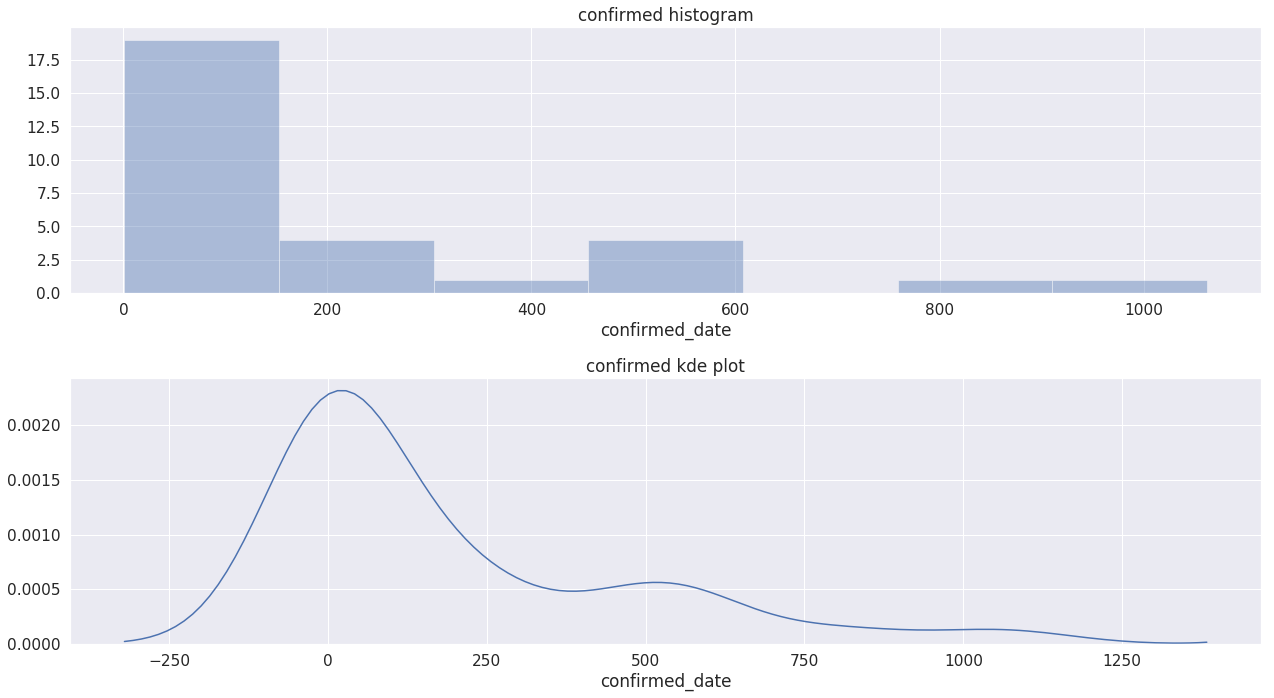

In [215]:
sns.set(font_scale=1.4)
# plt.rc('font', family='Malgun Gothic')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.distplot(raw_df['confirmed_date'].value_counts(), kde=False, ax=ax1)
sns.distplot(raw_df['confirmed_date'].value_counts(), bins=3, hist=False, ax=ax2)
ax1.set_title('confirmed histogram')
ax2.set_title('confirmed kde plot')
plt.tight_layout()

## 컬럼 순서 변경

In [216]:
# 편의상 컬럼 순서 변경!
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
1,2,male,Korea,filtered at airport,NaN,Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,3,male,Korea,Capital,NaN,Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,4,male,Korea,Capital,NaN,Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,5,male,Korea,Capital,NaN,Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0


In [217]:
raw_df.columns.tolist()

['id',
 'sex',
 'country',
 'region',
 'group',
 'infection_reason',
 'infection_order',
 'infected_by',
 'contact_number',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state',
 'age']

In [218]:
col = raw_df.columns[[0, 12, 13, 1, 2, 3, 9, 10, 11, 4, 5, 7, 8, 6]]
df = raw_df[col].copy()
print(df.shape)
df.head()

(5766, 14)


,id,state,age,sex,country,region,confirmed_date,released_date,deceased_date,group,infection_reason,infected_by,contact_number,infection_order
0,1,released,36.0,female,China,filtered at airport,2020-01-20,2020-02-06,NaT,NaN,Wuhan,NaN,45.0,1.0
1,2,released,56.0,male,Korea,filtered at airport,2020-01-24,2020-02-05,NaT,NaN,Wuhan,NaN,75.0,1.0
2,3,released,54.0,male,Korea,Capital,2020-01-26,2020-02-12,NaT,NaN,Wuhan,NaN,16.0,1.0
3,4,released,56.0,male,Korea,Capital,2020-01-27,2020-02-09,NaT,NaN,Wuhan,NaN,95.0,1.0
4,5,released,33.0,male,Korea,Capital,2020-01-30,2020-03-02,NaT,NaN,Wuhan,NaN,31.0,1.0


In [219]:
# df.to_csv('../corona/corona(kaggle)_update_data.csv')

## 추이

In [220]:
len(df.id.unique())

5766

In [221]:
confirm = pd.pivot_table(data=df,
                        index='confirmed_date',
                        values='id',
                        aggfunc=len)
confirm.rename(columns={'id':'count'}, inplace=True)
confirm

,count
confirmed_date,
2020-01-20,1
2020-01-24,1
2020-01-26,1
2020-01-27,1
2020-01-30,3
2020-01-31,4
2020-02-01,1
2020-02-02,3
2020-02-04,1


In [222]:
confirm.iplot(kind='line',
             xTitle='날짜',
             yTitle='확진자수',
             title='확진자 추이',
             theme=cf.set_config_file(theme='solar'))

Text(0.5, 0, '2020.01.26~2020.03.04')

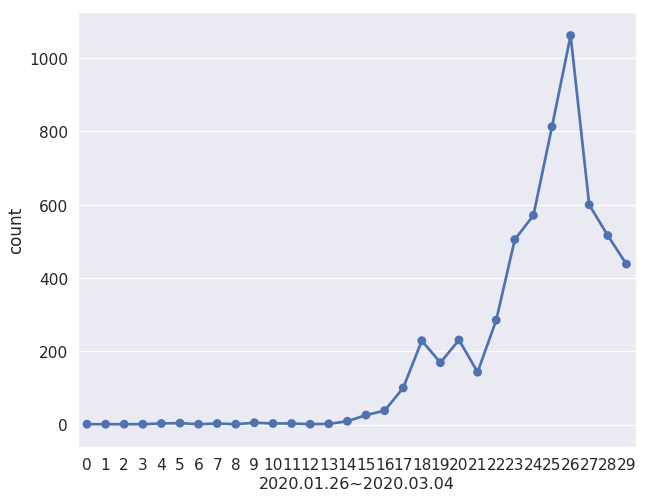

In [223]:
plt.figure(figsize=(10,8))
sns.pointplot(data=confirm.reset_index(), x=np.arange(len(confirm.reset_index()['confirmed_date'])), y='count')
plt.xlabel('2020.01.26~2020.03.04',
          fontdict={'size':16})

In [224]:
release = df.groupby('released_date')['id'].count().to_frame()
decease = df.groupby('deceased_date')['id'].count().to_frame()

In [225]:
confirm_reset = confirm.reset_index()
release_reset = release.reset_index()
decease_reset = decease.reset_index()
data_merged = confirm_reset.merge(release_reset,
                    how='inner',
                    left_on='confirmed_date',
                    right_on='released_date', ).\
merge(decease_reset,
     how='inner', left_on='released_date', right_on='deceased_date')

data_merged.drop(columns=['released_date', 'deceased_date'], axis=1, inplace=True)
data_merged.columns = ['date', 'confirmed', 'released', 'deceased']
data_merged

,date,confirmed,released,deceased
0,2020-02-19,26,4,1
1,2020-02-21,100,1,1
2,2020-02-24,231,4,2
3,2020-02-26,285,2,1
4,2020-02-27,505,4,1
5,2020-03-01,1062,1,3
6,2020-03-02,600,1,3


In [226]:
data_merged.set_index('date').iplot(kind='box')

In [227]:
data_merged.set_index('date').iplot(kind='barh')

In [228]:
cf.set_config_file(theme='ggplot')
data_merged.set_index('date').iplot(kind='surface')

In [229]:
data_merged.set_index('date').iplot(kind='spread')

## 확진자 예측

Text(0.5, 1.0, 'confirmed Cumulative trend')

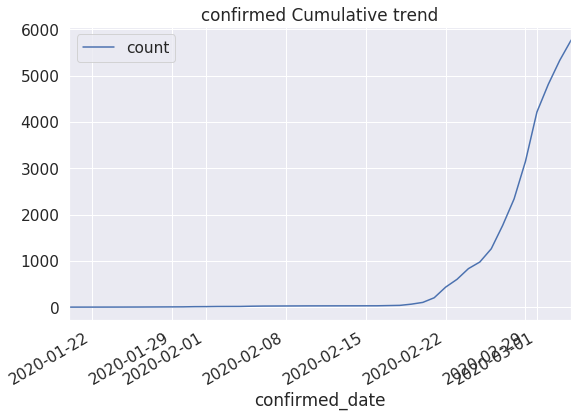

In [230]:
plt.rc('font', family='Malgun Gothic')
confirm.cumsum().plot(figsize=(9,6))
plt.title('confirmed Cumulative trend')

#### - ARIMA로 예측해보기

In [231]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

confirm_cumsum = confirm.cumsum()
# confirm_cumsum = confirm_cumsum['count'].astype(float).to_frame()
confirm_cumsum.tail()

,count
confirmed_date,
2020-02-29,3149
2020-03-01,4211
2020-03-02,4811
2020-03-03,5327
2020-03-04,5765


In [232]:
model = ARIMA(confirm_cumsum['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()
# 계수들의 p-value 값이 유의수준 0.05보다 작음. AR=1, MA=1, 차분=2로 설정하는 것 유의미하다고 보여짐.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   28
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -174.304
Method:                       css-mle   S.D. of innovations            119.076
Date:                Thu, 05 Mar 2020   AIC                            356.608
Time:                        10:36:34   BIC                            361.937
Sample:                             2   HQIC                           358.237
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4082      9.217      2.323      0.020       3.344      39.472
ar.L1.D2.y     0.7837      0.140      5.585      0.000       0.509       1.059
ma.L1.D2.y    -1.0000      0.094    -10.656      0.000      -1.184      -0.816
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2761           +0.0000j            1.2761            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

계수들의 p-value값이 0.05보다 작으므로 AR, MA, 차분값 유의미하다고 보여짐

Text(0.5, 1.0, 'Error Variation of Actual and Predicted Values')

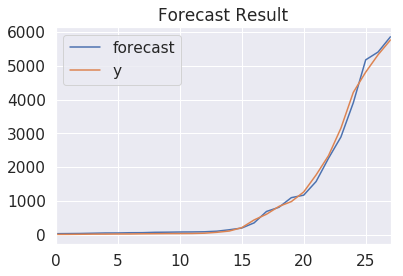

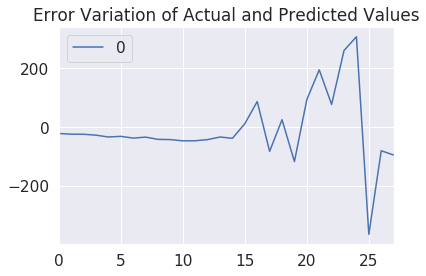

In [233]:
plt.rc('font', family='Malgun Gothic')
fit_model.plot_predict()
plt.title('Forecast Result')
pd.DataFrame(fit_model.resid).plot()
plt.title('Error Variation of Actual and Predicted Values')

####  - 이 ARIMA 모델로 3월 5일부터 10일까지 누적 확진자 수 예측

In [234]:
forcast = fit_model.forecast(steps=6)
pred_y = forcast[0].tolist()
pred_y

[6240.9954434251495,
 6751.397713386783,
 7293.394583498821,
 7864.782247255323,
 8463.833687535742,
 9089.195524119703]

In [235]:
pd.DataFrame(data=pred_y,
             index=['3/5', '3/6', '3/7', '3/8', '3/9', '3/10'],
            columns=['confirmed_count(cumsum)'])

,confirmed_count(cumsum)
3/5,6240.995443
3/6,6751.397713
3/7,7293.394583
3/8,7864.782247
3/9,8463.833688
3/10,9089.195524


**3월 5일 오후 19시 31분 기준으로 실제 누적 확진자 수는 6088명**  
ARIMA 모델로 예측한 값(6240명)과 실제 값 사이에 오차가 조금은 있지만 유사함

### fbprophet으로 예측

In [236]:
from fbprophet import Prophet

In [261]:
fb_data = confirm_cumsum.reset_index()
fb_data.columns = ['ds','y']
fb_data

,ds,y
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-30,7
5,2020-01-31,11
6,2020-02-01,12
7,2020-02-02,15
8,2020-02-04,16
9,2020-02-05,21


In [313]:
prophet = Prophet(growth='linear',
                  seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_range=0.6, # 데이터의 60% 정도에서 changepoint
                  changepoint_prior_scale=0.1) 
prophet.fit(fb_data)

In [314]:
# 4일 동안의 확진자 수(누적) 예측
future_data = prophet.make_future_dataframe(periods=4)
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
24,2020-02-28,2335.377682,2319.881367,2350.008420
25,2020-02-29,3155.718517,3140.490118,3170.073864
26,2020-03-01,4197.917153,4183.645985,4213.545208
27,2020-03-02,4820.853876,4804.970946,4836.395622
28,2020-03-03,5323.644768,5308.341056,5337.993690
29,2020-03-04,5765.541965,5751.544164,5781.072334
30,2020-03-05,6298.799025,6278.278276,6316.998591
31,2020-03-06,6484.177898,6450.120650,6511.420576
32,2020-03-07,6630.252442,6571.171449,6681.754890
33,2020-03-08,6638.664999,6546.941372,6726.384686


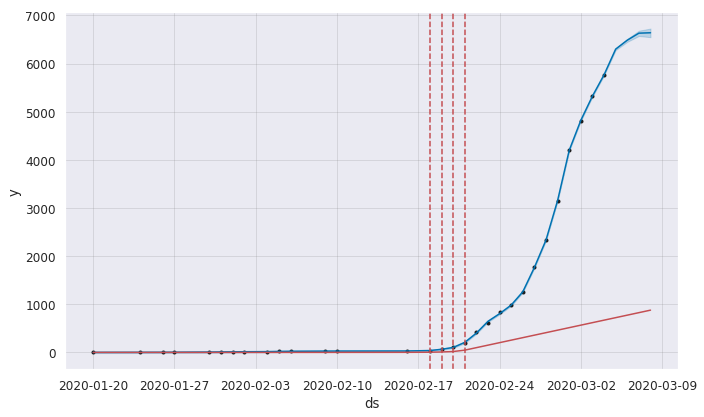

In [315]:
from fbprophet.plot import add_changepoints_to_plot

fig = prophet.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast_data)

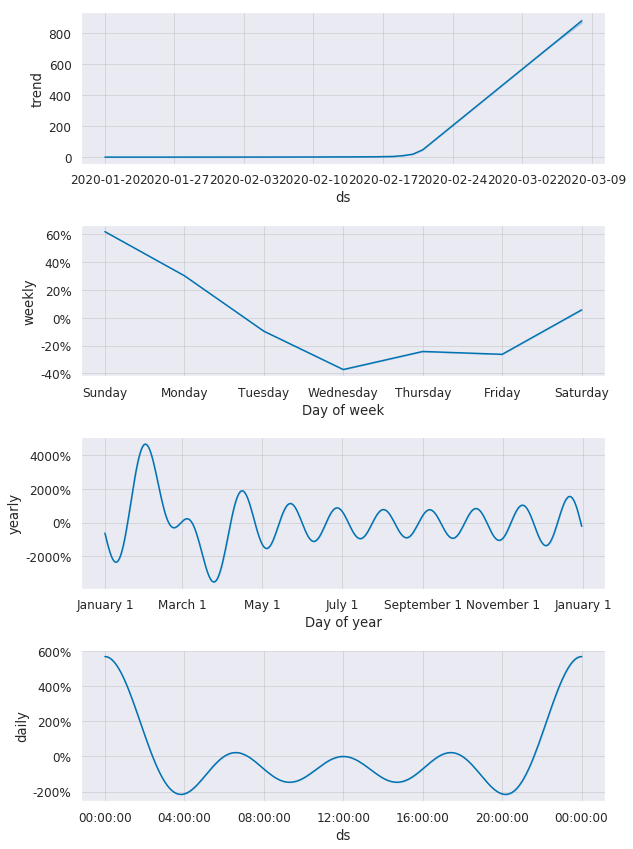

In [316]:
sns.set(font_scale=1.1)
fig1 = prophet.plot_components(forecast_data)
plt.tight_layout()

- 1번 그래프는 시계열 데이터의 전체적인 트렌드를 보여주고
- 2번 그래프는 weekly 트렌드를
- 3번 그래프는 yearly 트렌드를
- 마지막 4번 그래프는 daily 트렌드를 보여준다